# ML Project: Creditworthiness Estimation Model 

This project is dedicated to the development of a machine learning model designed to estimate a customer's creditworthiness.

We begin with exploratory data analysis (EDA) of the credit_record.csv and application_record.csv datasets, which provide information about credit status and personal details of clients.

After a proper target estimation based on credit status information and data preprocessing, we continue with the Model Building phase, where multiple models are considered. We start with a Decison Tree model, gradually progressing to explore more complex models, including Random Forest, Balanced Random Forest, XGBoost and lightgbm. This comprehensive model selection process, which also includes the fine-tuning of the hyperparameters for each model, enables us to thoroughly assess their performance using a range of evaluation metrics, such as balanced accuracy and the F2 score, ensuring a meticulous examination of each model's predictive capabilities. The latter leads to the selection of the final model.

Finally, to gain a deeper understanding of the model's inner workings and to assess the significance of each feature in shaping the predictions for individual instances, we employ the SHAP technique, thereby shedding light on the hidden mechanisms at play within our machine learning model.

In summary, this project represents a comprehensive journey through the development of a creditworthiness estimation model, encompassing data exploration, model building, rigorous performance evaluation, and results' interpretability, all with the ultimate goal of providing valuable insights into the creditworthiness of our customers.

### Table of Contents

* 1. [Import and introductory study of data](#1)
   * [1.1. Data import and control](#2)
   * [1.2. Target Estimation (credit_df dataset)](#3)
   * [1.3. Dataset providing information on customers ( application_df dataset)](#4)

* 2. [Exploratory Data Analysis (EDA)](#5)
   * [2.1. Analysis of target distribution (bad_customer)](#6)
   * [2.2. Checking featuress](#7)
   * [2.3. Study of distribution and correlations between features](#8)

* 3. [Preprocessing](#9)
   * [3.1. Column Transformer](#10)
   * [3.2. Choice of the proper metric](#11) 
   
* 4. [Model Building](#12)
   * [4.1. Baseline model with spot-check](#13)
   * [4.2. Pipeline for different models](#14)
   * [4.3. Random Forests and Gradient Boosting Trees](#15)
  
* 5. [Interpreting the final model](#16)

<a id="1"> </a>
### 1.Import and introductory study of data

<a id="2"> </a>
#### 1.1. Data import and control

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="darkgrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)
#This will configure the IPython interactive shell to show all available output without having
#to explicitly specify the print() function.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id="3"> </a>
#### 1.2. Target estimation (credit_df dataset)

Let us start by importing the dataframe contained in credit_record.csv:

In [2]:
credit_df = pd.read_csv("credit_record.csv")
credit_df
("Shape: {} ".format(credit_df.shape)) #check the number of rows and columns
("Nunique value:{}".format(credit_df["ID"].nunique()))

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

'Shape: (1048575, 3) '

'Nunique value:45985'

The data contained in this dataframe are:
* `ID`: Client number;
* `MONTHS_BALANCE`: The month of the extracted data is the starting point, backwards: 0 is the current month, -1 is the previous month, and so on;
* `STATUS`: 
    * 0: 1-29 days past due;
    * 1: 30-59 days past due;
    * 2: 60-89 days overdue;
    * 3: 90-119 days overdue;
    * 4: 120-149 days overdue;
    * 5: overdue or bad debts, write-offs for more than 150 days;
    * C: paid off that month;
    * X: no loan for the month.

Therefore, we have credit status information for 45,985 customers over varying time periods.

Let us group the `credit_df` DataFrame by customer ID and create a pivot table, `pivot_tb`, where each cell represents a customer's credit status at a specific month:

In [3]:
grouped_df = credit_df.groupby('ID')
pivot_tb = credit_df.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb

MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715         NaN    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

MONTHS_BALANCE  -48  -47  -46  -45  -44  -43  -42  -41  -40  -39  -38  -37  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

MONTHS_BALANCE  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26  -25  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0    0    0    0   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN    C    C    C    C    C   

MONTHS_BALANCE  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN    0    0    0    0    0    0   
5001713         NaN  NaN  NaN    X    X    X    X    X    X    X    X    X   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    X    X   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482           0    0    0    0    0    0    0    0    C    C    C    C   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN    X    X    X    X    X   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487           C

For each ID, let us compute the `open_month` and `end_month` variables, indicating the month when the account was opened and the last month for which we have data, respectively:

In [4]:
pivot_tb['open_month'] = grouped_df['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped_df['MONTHS_BALANCE'].max()
pivot_tb

MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715         NaN    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

MONTHS_BALANCE  -48  -47  -46  -45  -44  -43  -42  -41  -40  -39  -38  -37  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

MONTHS_BALANCE  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26  -25  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0    0    0    0   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN    C    C    C    C    C   

MONTHS_BALANCE  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  \
ID                                                                           
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN    0    0    0    0    0    0   
5001713         NaN  NaN  NaN    X    X    X    X    X    X    X    X    X   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    X    X   
5001715           X    X    X    X    X    X    X    X    X    X    X    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482           0    0    0    0    0    0    0    0    C    C    C    C   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN    X    X    X    X    X   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5150487           C

From the latter two variables, the `window` can be built, providing information on the time period for which we have data:

In [5]:
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb.loc[:, 'window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb.reset_index(drop = True, inplace = True)
pivot_tb

MONTHS_BALANCE       ID  open_month  end_month  window
0               5001711          -3          0       3
1               5001712         -18          0      18
2               5001713         -21          0      21
3               5001714         -14          0      14
4               5001715         -59          0      59
...                 ...         ...        ...     ...
45980           5150482         -28        -11      17
45981           5150483         -17          0      17
45982           5150484         -12          0      12
45983           5150485          -1          0       1
45984           5150487         -29          0      29

[45985 rows x 4 columns]

Finally, let us merge the `credit_df` DataFrame with the `pivot_tb` DataFrame using a left join:

In [6]:
credit_df = pd.merge(credit_df, pivot_tb, on = 'ID', how = 'left')
credit_df

ID  MONTHS_BALANCE STATUS  open_month  end_month  window
0        5001711               0      X          -3          0       3
1        5001711              -1      0          -3          0       3
2        5001711              -2      0          -3          0       3
3        5001711              -3      0          -3          0       3
4        5001712               0      C         -18          0      18
...          ...             ...    ...         ...        ...     ...
1048570  5150487             -25      C         -29          0      29
1048571  5150487             -26      C         -29          0      29
1048572  5150487             -27      C         -29          0      29
1048573  5150487             -28      C         -29          0      29
1048574  5150487             -29      C         -29          0      29

[1048575 rows x 6 columns]

In [7]:
credit_df["window"].max()

60

To classify a customer as 'good' or 'bad,' it is necessary to determine an appropriate **performance window**.

If the observation window is too short, users' behavior may not fully manifest, leading to unnecessary noise in our data. Therefore, only customers with an observation window longer than the performance window will be considered, and the latter will be defined as the period during which the event rate stabilizes, meaning that the event rate does not increase significantly.

In [8]:
## Definition of _obs_window_analysis
def _obs_window_analysis(credit: pd.DataFrame, command: str):
    """
    Calculate observe window.

    Args:
        credit (pd.DataFrame): 
            Credit data as a pandas DataFrame.
        command (str): 
            Python command used for data manipulation.

    Returns:
        pd.Series: A pandas Series containing calculated rates.
    """
    id_sum = len(set(credit['ID']))
    credit['status'] = 0
    exec(command)
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    # minimum value of `month_on_book` such that status==1 for each ID:
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    rates_df = pd.DataFrame({'month_on_book': range(0,credit["window"].max()+1), 'rate': None})
    lst = []
    for i in range(0,credit["window"].max()+1):
        # select the IDs with first time having status=1 in month_on_book==i:
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        rates_df.loc[rates_df['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return rates_df['rate']




# Analysis commands
command = "credit_df.loc[(credit_df['STATUS'] == '1') | (credit_df['STATUS'] == '2') | " \
    "(credit_df['STATUS'] == '3' ) | (credit_df['STATUS'] == '4' ) | (credit_df['STATUS'] == '5'), 'status'] = 1"
morethan30 = _obs_window_analysis(credit_df, command)

command = "credit_df.loc[(credit_df['STATUS'] == '2') | (credit_df['STATUS'] == '3' ) | " \
    "(credit_df['STATUS'] == '4' ) | (credit_df['STATUS'] == '5'), 'status'] = 1"
morethan60 = _obs_window_analysis(credit_df, command)

command = "credit_df.loc[(credit_df['STATUS'] == '3' ) | (credit_df['STATUS'] == '4' ) | " \
    "(credit_df['STATUS'] == '5'), 'status'] = 1"
morethan90 = _obs_window_analysis(credit_df, command)

command = "credit_df.loc[(credit_df['STATUS'] == '4' ) | (credit_df['STATUS'] == '5'), 'status'] = 1"
morethan120 = _obs_window_analysis(credit_df, command)

command = "credit_df.loc[(credit_df['STATUS'] == '5'), 'status'] = 1"
morethan150 = _obs_window_analysis(credit_df, command)

# Creating labels and data
labels = [
    'More than 30 days past due',
    'More than 60 days past due',
    'More than 90 days past due',
    'More than 120 days past due',
    'More than 150 days past due'
]
data = [morethan30, morethan60, morethan90, morethan120, morethan150]

# Graph configuration and display

plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(data[i], label=labels[i])
plt.title('Cumulative % of Bad Customers', fontsize=18)
plt.xlabel('Month on Book', fontsize=14)
plt.ylabel('Cumulative %', fontsize=14)
plt.legend()
plt.show();

In [9]:
def get_performance_window(credit: pd.DataFrame, command: str, ratio=0.9):
    """
    Get the performance window based on the given command and ratio.

    Args:
        credit (pd.DataFrame): 
            Credit data as a pandas DataFrame.
        command (str): 
            Python command used for data manipulation.
        ratio (float, optional): 
            The threshold ratio for performance window calculation. Default is 0.9.

    Returns:
        int: The calculated performance window.
    """
    rates = _obs_window_analysis(credit, command)
    max_value = max(rates)
    threshold = ratio * max_value
    # search the index (i.e. the number of months from the current one)
    # of the value greater than or equal to the threshold:
    performance_window = next((i for i, rate in enumerate(rates) if rate >= threshold), None)
    return performance_window

morethan60_command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' ) | " \
    " (credit['STATUS'] == '4' ) | (credit['STATUS'] == '5'), 'status'] = 1"
performance_window = get_performance_window(credit_df, morethan60_command)
performance_window

21

Therefore, using "more than 60 days past due" as status to identify a bad customer, the performance window (defined as the first month on book at which the event rate is greater than or equal to the 90% of the total event rate) is set to 21, and all the customers with an observation window shorter than the performance window are excluded from the analysis:

In [10]:
credit_df = credit_df[credit_df['window'] >= performance_window]
# 0: < 60 days past due, 1: > 60 days past due 
credit_df['status'] = np.where((credit_df['STATUS'] == '2' ) | (credit_df['STATUS'] == '3' ) | (credit_df['STATUS'] == '4' ) | (credit_df['STATUS'] == '5'), 1, 0) 
credit_df.loc[:, 'status'] = credit_df['status'].astype(np.int8)
# Calculate month on book: how many months after opening account
credit_df['month_on_book'] = credit_df['MONTHS_BALANCE'] - credit_df['open_month'] 
credit_df.sort_values(by = ['ID','month_on_book'], inplace = True)
credit_df

ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
44       5001713             -21      X         -21          0      21   
43       5001713             -20      X         -21          0      21   
42       5001713             -19      X         -21          0      21   
41       5001713             -18      X         -21          0      21   
40       5001713             -17      X         -21          0      21   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  
44            0              0  
43            0              1  
42            0              2  
41            0              3  
40            0              4  
...         ...            ...  
1048549       0             25  
1048548       0             26  
1048547       0             27  
1048546       0             28  
1048545       0             29  

[775282 rows x 8 columns]

In [11]:
#calculate the total number of unique customers with bad credit behaviour
bad_customer_ids = credit_df[credit_df['status'] == 1]['ID'].unique()
len(bad_customer_ids)

492

In [12]:
bad_customer_df = pd.DataFrame({'ID': credit_df['ID'].unique()})
bad_customer_df['bad_customer'] = bad_customer_df['ID'].isin(bad_customer_ids).astype(np.int8)
bad_customer_df

ID  bad_customer
0      5001713             0
1      5001715             0
2      5001717             0
3      5001718             0
4      5001719             0
...        ...           ...
20919  5150475             0
20920  5150476             0
20921  5150480             0
20922  5150481             0
20923  5150487             0

[20924 rows x 2 columns]

We are now ready to merge `bad_customer_df` with the dataset providing information on customers, in order to train a ML model to decide whether to issue a credit card to the applicant.

<a id="4"> </a>
#### 1.3. Dataset providing information on customers ( application_df dataset)

We start by importing the `application_df` dataset:

In [13]:
application_df = pd.read_csv("application_record.csv")
application_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

It is made of 438557 samples and 18 columns:

1. `ID`: Client number;
2. `CODE_GENDER`: Gender;
3. `FLAG_OWN_CAR`: Is there a car;
4. `FLAG_OWN_REALTY`: Is there a property;
5. `CNT_CHILDREN`: Number of children;
6. `AMT_INCOME_TOTAL`: Annual income;
7. `NAME_INCOME_TYPE`: Income category (Working, Commercial associate, Pensioner, State servant, Student);
8. `NAME_EDUCATION_TYPE`: Education level (Secondary/secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree);
9. `NAME_FAMILY_STATUS`: Marital status (Married, Single/not married, Civil marriage, Separated, Widow);
10. `NAME_HOUSING_TYPE`: Way of living (House/apartment, With parents, Municipal apartment, Rented apartment, Office apartment, Co-op apartment);
11. `DAYS_BIRTH`: Birthday. Count backwards from current day(0), -1 means yesterday;
12. `DAYS_EMPLOYED`: Start date of employment. Count backwards from current day(0). If positive, it means the person is currently unemployed;
13. `FLAG_MOBIL`: Is there a mobile phone;
14. `FLAG_WORK_PHONE`: Is there a work phone;
15. `FLAG_PHONE`: Is there a phone;
16. `FLAG_EMAIL`: Is there an email;
17. `OCCUPATION_TYPE`: Occupation;
18. `CNT_FAM_MEMBERS`: Family size.

In [14]:
application_df['ID'].nunique()

438510

In [15]:
len(application_df[application_df['ID'].isin(bad_customer_df['ID'])])

15166

Therefore, even though there are 438510 IDs in `application_df`, the ones that are present both in the latter and in `bad_customer_df` are 15166. Let us merge the two dataframes through an inner join, to keep only the rows associated with the common IDs: 

In [16]:
final_df = pd.merge(bad_customer_df, application_df, on = 'ID', how = 'inner')
final_df

ID  bad_customer CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      5008806             0           M            Y               Y   
1      5008810             0           F            N               Y   
2      5008811             0           F            N               Y   
3      5008825             0           F            Y               N   
4      5008826             0           F            Y               N   
...        ...           ...         ...          ...             ...   
15161  5150475             0           M            Y               Y   
15162  5150476             0           M            Y               Y   
15163  5150480             0           F            Y               Y   
15164  5150481             0           F            Y               Y   
15165  5150487             0           M            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0                 0          112500.0               Working   
1                 0          270000.0  Commercial associate   
2                 0          270000.0  Commercial associate   
3                 0          130500.0               Working   
4                 0          130500.0               Working   
...             ...               ...                   ...   
15161             0          202500.0               Working   
15162             0          202500.0               Working   
15163             1          157500.0               Working   
15164             1          157500.0               Working   
15165             0          202500.0               Working   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0      Secondary / secondary special               Married  House / apartment   
1      Secondary / secondary special  Single / not married  House / apartment   
2      Secondary / secondary special  Single / not married  House / apartment   
3                  Incomplete higher               Married  House / apartment   
4                  Incomplete higher               Married  House / apartment   
...                              ...                   ...                ...   
15161  Secondary / secondary special        Civil marriage  House / apartment   
15162  Secondary / secondary special        Civil marriage  House / apartment   
15163  Secondary / secondary special               Married  House / apartment   
15164  Secondary / secondary special               Married  House / apartment   
15165  Secondary / secondary special               Married  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
0          -21474          -1134           1                0           0   
1          -19110          -3051           1                0           1   
2          -19110          -3051           1                0           1   
3          -10669          -1103           1                0           0   
4          -10669          -1103           1                0           0   
...           ...            ...         ...              ...         ...   
15161      -10886          -1315           1                1           0   
15162      -10886          -1315           1                1           0   
15163      -10808          -1739           1                0           0   
15164      -10808          -1739           1                0           0   
15165      -19398          -2166           1                0           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0               0  Security staff              2.0  
1               1     Sales staff              1.0  
2               1     Sales staff              1.0  
3               0     Accountants              2.0  
4               0     Accountants              2.0  
...           ...             ...              ...  
15161           0        Laborers              2.0  
15162           0        Laborers              2.0  
151

<a id="5"> </a>
### 2.Exploratory Data Analysis (EDA)

In [17]:
("Shape: {}".format(final_df.shape)) #check the number of rows and columns
final_df.info() #check features type and missing values
# Visualizing missing values
#df.isnull().sum().any()
msno.matrix(final_df, color=" 0.1")
plt.show()

'Shape: (15166, 19)'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15166 entries, 0 to 15165
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15166 non-null  int64  
 1   bad_customer         15166 non-null  int8   
 2   CODE_GENDER          15166 non-null  object 
 3   FLAG_OWN_CAR         15166 non-null  object 
 4   FLAG_OWN_REALTY      15166 non-null  object 
 5   CNT_CHILDREN         15166 non-null  int64  
 6   AMT_INCOME_TOTAL     15166 non-null  float64
 7   NAME_INCOME_TYPE     15166 non-null  object 
 8   NAME_EDUCATION_TYPE  15166 non-null  object 
 9   NAME_FAMILY_STATUS   15166 non-null  object 
 10  NAME_HOUSING_TYPE    15166 non-null  object 
 11  DAYS_BIRTH           15166 non-null  int64  
 12  DAYS_EMPLOYED        15166 non-null  int64  
 13  FLAG_MOBIL           15166 non-null  int64  
 14  FLAG_WORK_PHONE      15166 non-null  int64  
 15  FLAG_PHONE           15166 non-null 

<AxesSubplot:>

The only column with missing values is `OCCUPATION_TYPE`

<a id="6"> </a>
#### 2.1.Analysis of target distribution (bad_customer)

In [18]:
#I start by drawing a histogram to visualise the distribution of bad_customer feature

fig = px.pie(final_df, names='bad_customer', 
             title='Customer distribution',hole=0.4,opacity=0.6,
            color_discrete_sequence=["blue", "red"])
fig.show()
           

final_df["bad_customer"].value_counts()


counts = np.array(np.unique(final_df.bad_customer, return_counts=True)).T
total_counts = np.sum(counts[:,1])
counts_0 = counts[0,1]/total_counts
counts_1 = counts[1,1]/total_counts
(f"Percentage of good customers: {counts_0*100:.2f} %")
(f"Percentage of bad customers: {counts_1*100:.2f} %")

0    14722
1      444
Name: bad_customer, dtype: int64

'Percentage of good customers: 97.07 %'

'Percentage of bad customers: 2.93 %'

It's clear that:
- we have to deal with an **imbalanced dataset**
- this is a **classification problem**<br>
Before preprocessing the features of the problem, we create the `y` variable ( our **target variable**)  and remove the `bad_customer` variable from the dataframe:

In [19]:
y = final_df["bad_customer"].values
final_df.drop("bad_customer", axis=1, inplace=True)

<a id="7"> </a>
#### 2.2. Checking features

Let's start our analysis by checking whether there are duplicate values for the `ID` variable:

In [20]:
len(set(final_df['ID'])), len(final_df)

(15166, 15166)

Therefore, there are no duplicate values.

We now consider the `DAYS_EMPLOYED` variable:

In [21]:
final_df[final_df["DAYS_EMPLOYED"]>0]["DAYS_EMPLOYED"].value_counts()

365243    2465
Name: DAYS_EMPLOYED, dtype: int64

In [22]:
unemployed_ratio = final_df[final_df["DAYS_EMPLOYED"]>0]["DAYS_EMPLOYED"].value_counts().values[0]/len(final_df)
round(unemployed_ratio, 3)

0.163

Recall that a positive value in the `DAYS_EMPLOYED` column indicates that the person is currently unemployed. Therefore, it can be observed that around 16% of the analyzed customers are currently unemployed.

Furthermore, as expected, `OCCUPATION_TYPE` is null for the unemployed customers:

In [23]:
final_df[final_df["DAYS_EMPLOYED"]>0]["OCCUPATION_TYPE"].isna().sum()

2465

We might assign it the value "Unemployed":

In [24]:
final_df.loc[final_df["DAYS_EMPLOYED"]>0,"OCCUPATION_TYPE"] = "Unemployed"

Regarding the `DAYS_EMPLOYED` variable, let's write a code snippet to perform a data quality check. We'll check whether `DAYS_BIRTH` is consistently greater than `DAYS_EMPLOYED`. In a valid dataset, the age of a person (`DAYS_BIRTH`) should always be greater than the number of days employed (`DAYS_EMPLOYED`), as a person should be born before they start working.

We'll identify and remove any rows that don't meet this condition. This ensures data integrity and accuracy in our analysis. Here's the code to achieve this:

In [25]:
invalid_rows = final_df[(abs(final_df['DAYS_BIRTH']) <= abs(final_df['DAYS_EMPLOYED'])) & (final_df["DAYS_EMPLOYED"]<=0)]
(f"Number of rows before: {len(final_df)}")
final_df.drop(invalid_rows.index, inplace=True)
(f"Number of rows after: {len(final_df)}")

'Number of rows before: 15166'

'Number of rows after: 15166'

To conclude with `DAYS_BIRTH` and `DAYS_EMPLOYED` variables, let's convert them into years, renaming the 2 columns to `AGE` and `YEARS_EMPLOYED`. For the unemployed customers, the value of `YEARS_EMPLOYED` has been set to 0:

In [26]:
def convert_days_to_years(data_frame: pd.DataFrame, column_name: str, new_column_name: str):
    """
    Convert a column representing days to years in a DataFrame.

    Args:
        data_frame (pd.DataFrame):
            The DataFrame containing the data.
        column_name (str):
            The name of the column to be converted from days to years.
        new_column_name (str):
            The new name to replace the existing column name.
    """
    data_frame[column_name] = data_frame[column_name].apply(lambda x: 0 if x>0 else x)
    data_frame[column_name] = \
        (abs(data_frame[column_name]) / 365.25).round().astype(int)
    data_frame.rename(columns={column_name: new_column_name}, inplace=True)
    
convert_days_to_years(final_df, "DAYS_BIRTH", "AGE")
convert_days_to_years(final_df, "DAYS_EMPLOYED", "YEARS_EMPLOYED")

In [27]:
final_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008806           M            Y               Y             0   
1      5008810           F            N               Y             0   
2      5008811           F            N               Y             0   
3      5008825           F            Y               N             0   
4      5008826           F            Y               N             0   
...        ...         ...          ...             ...           ...   
15161  5150475           M            Y               Y             0   
15162  5150476           M            Y               Y             0   
15163  5150480           F            Y               Y             1   
15164  5150481           F            Y               Y             1   
15165  5150487           M            Y               N             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              112500.0               Working  Secondary / secondary special   
1              270000.0  Commercial associate  Secondary / secondary special   
2              270000.0  Commercial associate  Secondary / secondary special   
3              130500.0               Working              Incomplete higher   
4              130500.0               Working              Incomplete higher   
...                 ...                   ...                            ...   
15161          202500.0               Working  Secondary / secondary special   
15162          202500.0               Working  Secondary / secondary special   
15163          157500.0               Working  Secondary / secondary special   
15164          157500.0               Working  Secondary / secondary special   
15165          202500.0               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE  YEARS_EMPLOYED  \
0                   Married  House / apartment   59               3   
1      Single / not married  House / apartment   52               8   
2      Single / not married  House / apartment   52               8   
3                   Married  House / apartment   29               3   
4                   Married  House / apartment   29               3   
...                     ...                ...  ...             ...   
15161        Civil marriage  House / apartment   30               4   
15162        Civil marriage  House / apartment   30               4   
15163               Married  House / apartment   30               5   
15164               Married  House / apartment   30               5   
15165               Married  House / apartment   53               6   

       FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0               1                0           0           0  Security staff   
1               1                0           1           1     Sales staff   
2               1                0           1           1     Sales staff   
3               1                0           0           0     Accountants   
4               1                0           0           0     Accountants   
...           ...              ...         ...         ...             ...   
15161           1                1           0           0        Laborers   
15162           1                1           0           0        Laborers   
15163           1                0           0           0      Core staff   
15164           1                0           0           0      Core staff   
15165           1                0           0           0         Drivers   

       CNT_FAM_MEMBERS  
0                  2.0  
1                  1.0  
2                  1.0  
3                  2.0  
4                  2.0  
...                ...  
15161              2.0  
15162              2.0  
15163              3.0  
15164              3.0  
15165              2.0  

[15166 rows x 18 columns]

In [28]:
max_years_employed = final_df["YEARS_EMPLOYED"].max()
int(max_years_employed)

43

The highest (absolute) value for days of employment corresponds to 43 years, which appears plausible, indicating the absence of anomalous values. A similar check on `DAYS_BIRTH` gives a minimum age of 22 and maximum age of 69, which are also plausible:

In [29]:
min_age = final_df["AGE"].min()
max_age = final_df["AGE"].max()
int(min_age), int(max_age)

(22, 69)

As said previously, the only column with missing values is `OCCUPATION_TYPE`

In [30]:
final_df.OCCUPATION_TYPE.value_counts(), final_df.OCCUPATION_TYPE.nunique()
(f"Proportion of missing values in OCCUPATION_TYPE: {(final_df[final_df.columns[final_df.isna().any()]].isna().sum().sum()/len(final_df))*100:.1f} %")

(Laborers                 2557
 Unemployed               2465
 Core staff               1517
 Sales staff              1359
 Managers                 1338
 Drivers                   955
 High skill tech staff     659
 Medicine staff            550
 Accountants               503
 Cooking staff             259
 Security staff            232
 Cleaning staff            213
 Private service staff     120
 Low-skill Laborers         64
 Secretaries                63
 Waiters/barmen staff       49
 HR staff                   30
 IT staff                   27
 Realty agents              17
 Name: OCCUPATION_TYPE, dtype: int64,
 19)

'Proportion of missing values in OCCUPATION_TYPE: 14.4 %'

The only column with missing values is `OCCUPATION_TYPE`, which has 19 different categories. As a start, it is decided to remove the variable from the dataset:

In [31]:
final_df.drop("OCCUPATION_TYPE", axis=1, inplace=True)

Furthermore, due to the single constant value (1) of FLAG_MOBIL, it has been chosen for its removal:

In [32]:
final_df["FLAG_MOBIL"].value_counts()
final_df.drop("FLAG_MOBIL", axis=1, inplace=True)

1    15166
Name: FLAG_MOBIL, dtype: int64

In addition, we update the column names that begin with `NAME_` by removing this prefix and remove the `ID` variable from the dataframe:

In [33]:
final_df.rename(columns={
    'NAME_HOUSING_TYPE': 'HOUSING_TYPE',
    'NAME_INCOME_TYPE': 'INCOME_TYPE',
    'NAME_EDUCATION_TYPE': 'EDUCATION_TYPE',
    'NAME_FAMILY_STATUS': 'FAMILY_STATUS'
}, inplace=True)
final_df.drop("ID", axis=1, inplace=True)

<a id="8"> </a>
#### 2.3. Study of distribution and correlations between features

In [34]:
final_df.insert(15, "bad_customer", pd.Series(y))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15166 entries, 0 to 15165
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODE_GENDER       15166 non-null  object 
 1   FLAG_OWN_CAR      15166 non-null  object 
 2   FLAG_OWN_REALTY   15166 non-null  object 
 3   CNT_CHILDREN      15166 non-null  int64  
 4   AMT_INCOME_TOTAL  15166 non-null  float64
 5   INCOME_TYPE       15166 non-null  object 
 6   EDUCATION_TYPE    15166 non-null  object 
 7   FAMILY_STATUS     15166 non-null  object 
 8   HOUSING_TYPE      15166 non-null  object 
 9   AGE               15166 non-null  int32  
 10  YEARS_EMPLOYED    15166 non-null  int32  
 11  FLAG_WORK_PHONE   15166 non-null  int64  
 12  FLAG_PHONE        15166 non-null  int64  
 13  FLAG_EMAIL        15166 non-null  int64  
 14  CNT_FAM_MEMBERS   15166 non-null  float64
 15  bad_customer      15166 non-null  int8   
dtypes: float64(2), int32(2), int64(4), int8(

Trying to catalogue features

In [35]:
#create lists for each type of feature to study their correlations and later,
#when it is time to train a learning model, encode them in numerical values.

#continuous numerical features:
num = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AGE", "YEARS_EMPLOYED", "CNT_FAM_MEMBERS"]

#ordinal categorical features:
cat_ord=["EDUCATION_TYPE"]

#binary categorical (qualitative) features:
binary = [i for i in final_df.columns if len(final_df[i].unique()) == 2]

#qualitative categorical features:
cat_qual = [i for i in final_df.columns if i not in binary and i not in cat_ord and i not in num]

        
("Continuous numerical features:{} Tot: {}".format(num,len(num)))
("Ordinal categorical features:{}Tot: {}".format(cat_ord,len(cat_ord)))
("Binary categorical (qualitative) features:{}Tot: {}".format(binary,len(binary)))
("Qualitative categorical features:{}Tot: {}".format(cat_qual,len(cat_qual)))

InteractiveShell.ast_node_interactivity = "last_expr"

"Continuous numerical features:['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS'] Tot: 5"

"Ordinal categorical features:['EDUCATION_TYPE']Tot: 1"

"Binary categorical (qualitative) features:['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'bad_customer']Tot: 7"

"Qualitative categorical features:['INCOME_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE']Tot: 3"

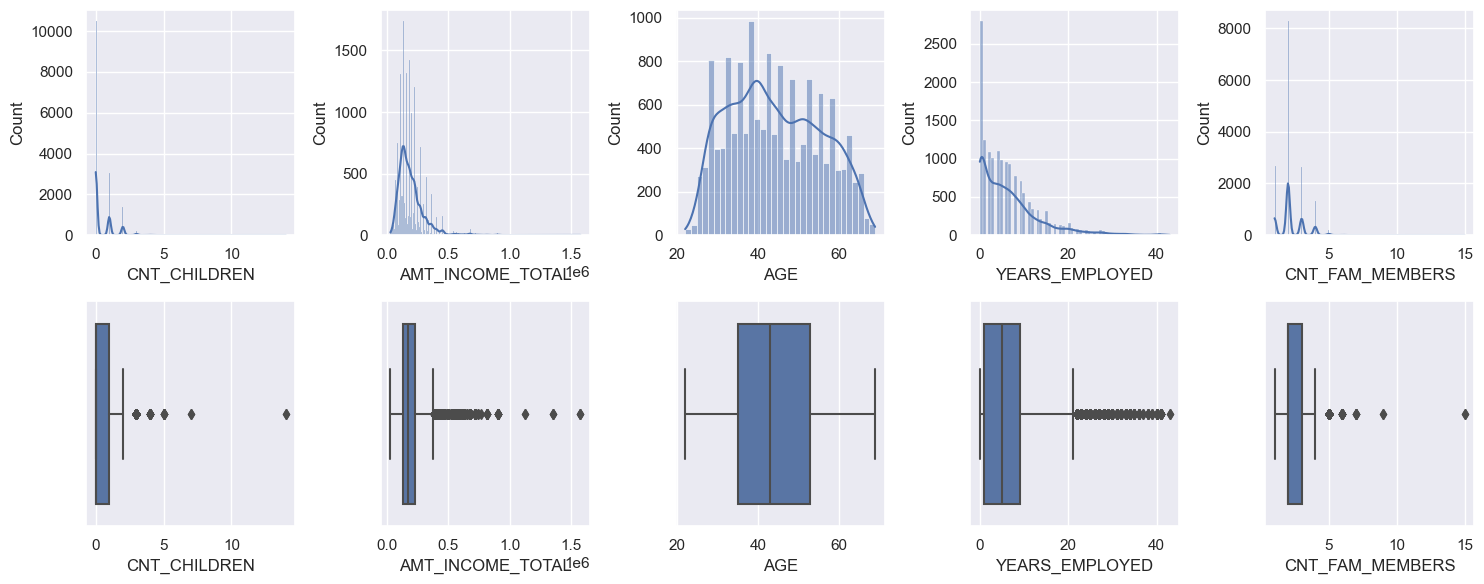

In [36]:
#drawing histograms and boxplots of the other numerical features

i = 1
plt.figure(figsize=(15,6))
for feature in num:
    plt.subplot(2,5,i)
    sns.histplot(data=final_df, x=feature, kde=True)
    plt.subplot(2,5,i+5)
    sns.boxplot(data=final_df, x=feature)
    plt.tight_layout()
    i+=1
plt.show()

Now let's take a look at the correlation between the numerical features

In [37]:
#first I draw a pairplot that will create a series of scatterplots, one for each combination of features
sns.pairplot(final_df[num], height=1.7, aspect=1.1, corner=True, diag_kind="kde")
plt.show()

It is not possibile to determine a clear correlation except between `CNT_CHILDREN` and `CNT_FAM_MEMBERS`<br>
I now create a heatmap containing the exact values of the correlations. The scores are calculated using *the Pearson correlation index*, which determines the covariance between variables. <br>
Scores closer to 1 will indicate a strong positive correlation, i.e. as the value of one feature increases, so will the value of the other feature. Conversely, scores close to -1 will indicate a negative correlation (as the value of one feature increases, the value of the other feature decreases). <br>
Scores close to 0 indicate no correlation.

In [38]:
#create a table with the correlation values
#the 'corr()' method uses Pearson's coefficient by default to study the covariance between features
fig = px.imshow(round(final_df[num].corr(),2), text_auto=True, title="Correlations between numerical features",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r, 
                color_continuous_midpoint=0,aspect="auto")
fig.show()


 THe correlation between `CNT_CHILDREN` and `CNT_FAM_MEMBERS`is confirmed. Indeed, family with a bigger number probably has a big number of children. <br>
 So I decide to remove `CNT_CHILDREN`

In [39]:
final_df.drop("CNT_CHILDREN", axis=1, inplace=True)

I move on to the analysis of the Binary categorical (qualitative) features.<br>
I study the variance of the `bad_customer` according to each value of the other binary features

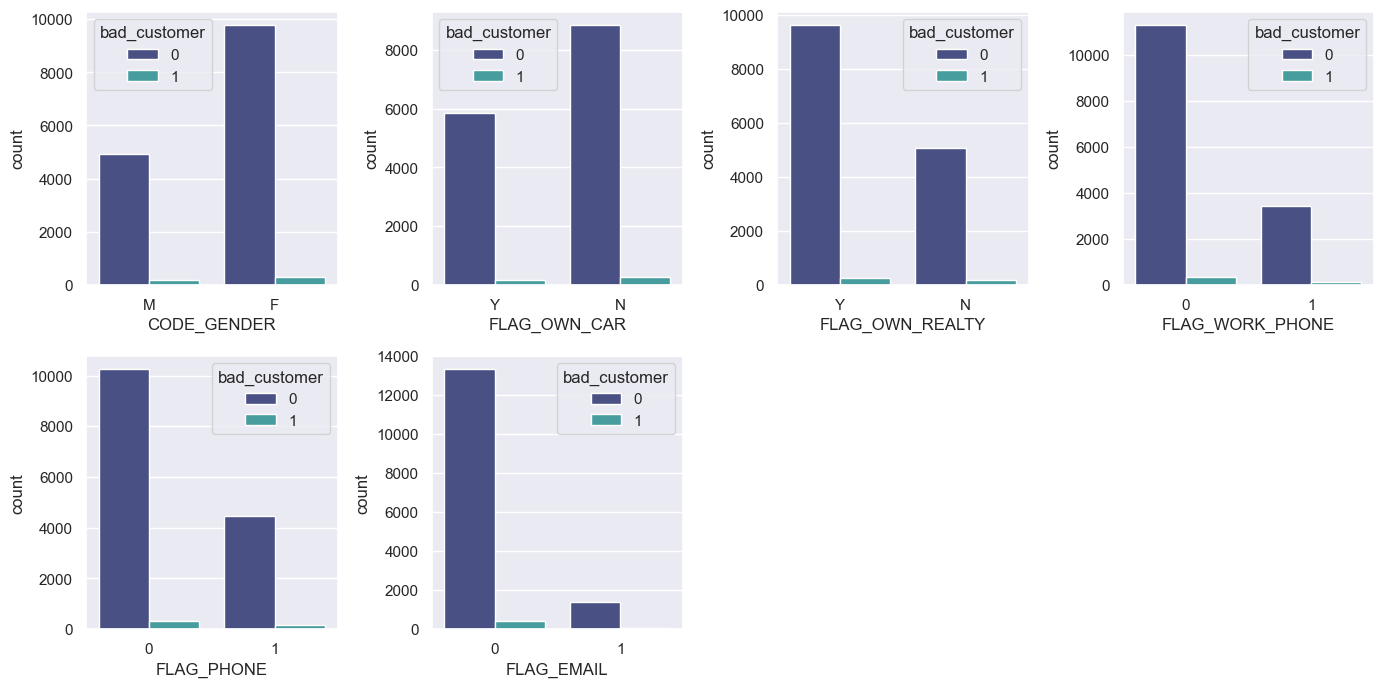

In [40]:
i=1
plt.figure(figsize=(14,10))
for col in binary[:-1]:
    plt.subplot(3,4,i)
    sns.countplot(data=final_df, x=col, palette="mako", hue="bad_customer")
    plt.tight_layout()
    i+=1

Nothing special emerges; we only learn that there are more females than males in the dataset

Let's take a quick look at the Ordinal categorical features in comparison with the target variable.

In [41]:
ax = sns.countplot(data=final_df, x="EDUCATION_TYPE", palette="mako", hue="bad_customer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

We can see that most have an education equivalent to Secondary/Secondary Special<br>
we also take a look at Qualitative Categorical features

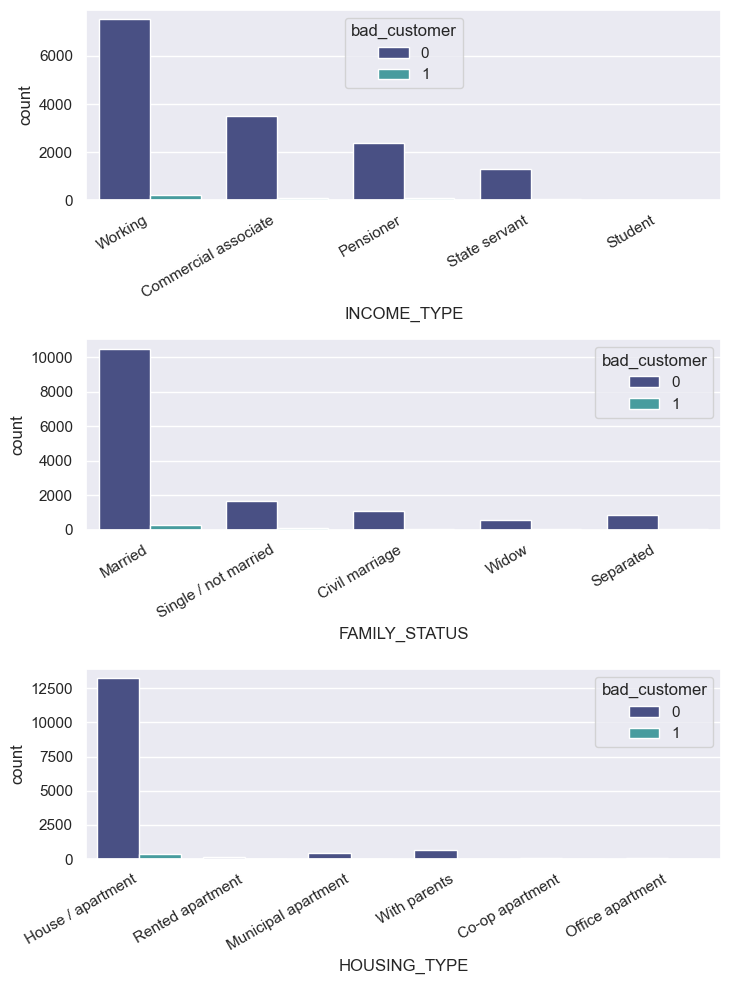

In [42]:
i=1
plt.figure(figsize=(14,10))
for col in cat_qual:
    plt.subplot(3,2,i)
    ax = sns.countplot(data=final_df, x=col, palette="mako", hue="bad_customer")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.tight_layout()
    i+=2

We note that most are married with House/apartment and Working as Income Type

In [43]:
InteractiveShell.ast_node_interactivity = "all"

<a id="9"> </a>
### 3.Preprocessing

After exploring the columns of the dataframe, it is decided to create a preprocessing function that performs all the following transformations on the data: 
* The two flag features `FLAG_OWN_CAR` and `FLAG_OWN_REALTY` are encoded using LabelEncoder, converting 'N' to 0 (No) and 'Y' to 1 (Yes). `FLAG_WORK_PHONE`, `FLAG_PHONE`, and `FLAG_EMAIL` are already encoded.
* Gender information in `CODE_GENDER` is similarly encoded, with 'F' denoting 0 for Female and 'M' representing 1 for Male.
* Education levels found in `NAME_EDUCATION_TYPE` are ordinal-encoded based on a predefined order. This ensures that 'Lower secondary' holds the lowest rank, while 'Academic degree' is at the highest.
* For our categorical features like `NAME_INCOME_TYPE`, `NAME_FAMILY_STATUS`, and `NAME_HOUSING_TYPE`, one-hot encoding has been applied, using OneHotEncoder. This step transforms these categories into binary columns, each indicating the presence or absence of a particular category. When indicating the number of categories for a categorical feature as $L$, it's important to note that only $L-1$ columns are needed, as adding the full $L$ columns would result in overparameterization. Therefore, after performing one-hot encoding, one column has been removed for each variable.
* The numerical features (, `AMT_INCOME_TOTAL`, `AGE`, `YEARS_EMPLOYED`, `CNT_FAM_MEMBERS`) undergo standardization. It is optional and can be avoided by setting the `standardize` parameter of the `DataPreprcessor` def equal to `False`.

All these preprocessing techniques are combined into a ColumnTransformer, which allows us to apply these transformations to the respective columns. The resulting `transformed_data` now contains our dataset in a format that's ready for training and prediction.

In [44]:
from sklearn.model_selection import train_test_split

X = final_df.drop(columns="bad_customer").values
random_seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle= True, stratify=y, random_state= random_seed)
(X_train.shape)
(y_train.shape)

(12132, 14)

(12132,)

<a id="10"> </a>
#### 3.1. Column transformer

I now apply the column transformer to the dataset, but since I will be using *Decision trees* or *ensembles* for training, I will not apply feature standardisation, which is not necessary for these models.

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Define a Column transformer
flag_mapping = ['N', 'Y']
gender_mapping = ['F', 'M']
education_order = ['Lower secondary', 'Secondary / secondary special', 
                            'Incomplete higher', 'Higher education', 'Academic degree']


preprocessor = ColumnTransformer(
    transformers=[
    ("label_flag", OrdinalEncoder(categories=[flag_mapping, flag_mapping]), [1,2]),
    ("label_gender", OrdinalEncoder(categories=[gender_mapping]), [0]),
    ("ordinal_education", OrdinalEncoder(categories=[education_order], handle_unknown="use_encoded_value", unknown_value=-1), [5]),
    ("onehot", OneHotEncoder(), [4,6,7])
       
], remainder="passthrough"
)



X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

<a id="11"> </a>
#### 3.2. Choise of the proper metric

Due to the highly imbalanced nature of the dataset, the model probably classifies all observations as belonging to the negative class

Here, **balanced accuracy** is considered instead of accuracy, which avoids inflated performance estimates on imbalanced datasets. It is the macro-average of recall scores per class. In the binary case, balanced accuracy is equal to the arithmetic mean of sensitivity (true positive rate) and specificity (true negative rate):
$$
\text{balanced accuracy} = \frac{1}{2}\left(\frac{TP}{TP+FN}+\frac{TN}{TN+FP}\right)
$$
Furthermore, let's assume that our client has requested a conservative approach, meaning they want to take minimal risks and avoid providing credit cards to unreliable individuals.

Furthermore, it has been opted to utilize the **F2 score** instead of the traditional **F1 score**, that is given by:
$$
F_\beta=(1+\beta^2)\cdot\frac{\text{precision}\cdot\text{recall}}{(\beta^2\cdot\text{precision})+\text{recall}}
$$
with $\beta=2$, which weights recall higher than precision. The reason is that having a false negative means to classify individuals as reliable when they are not and, in this way, the minimization of false negatives is prioritized.

<a id="12"> </a>
### 4. Model Building

<a id="13"> </a>
#### 4.1. Baseline model with spot-check

Spot checking is a great method to find out the baseline models for our data. It's quite easy and takes really less time.
I perform a spot check with StratifiedKFold . The models to be spotted will be: *Decision Tree*, *Random Forest Classifier*, and *Balanced Random Forest Classifier*.<br>
Random forests induce each constituent tree from a bootstrap sample of the training data. However, in cases of extremely imbalanced data, there is a significant probability that a bootstrap sample contains few or even none of the minority class, resulting in a tree with poor performance in predicting the minority class.
The concept of the Balanced Random Forest (BRF) algorithm is to ensemble trees that are induced from balanced down-sampled data. For each decision tree, a bootstrap sample from the minority class is drawn, and an equal number of cases are randomly selected, with replacement, from the majority class.<br>
I decide to use only one evaluation metric at this stage; for simplicity, I choose balanced accuracy. I will then use the other metrics chosen before for evaluating the performance of the models.<br>
Finally I use *Voting Classifier* that is an ensemble method in machine learning that combines multiple individual models to make predictions. It works by aggregating the predictions of each individual model and selecting the final prediction based on a certain voting rule.<br>
There are two main types of voting:<br>
- Hard Voting: In this approach, the ensemble model selects the class that has received the most votes among all the individual classifiers. The final prediction is based on the class with the majority vote.<br>
- Soft Voting: In this method, the ensemble model takes into account the predicted probabilities from each individual classifier and selects the class with the highest average probability. This approach is particularly useful when classifiers in the ensemble can produce probability estimates for the target classes.<br>
The choice between hard voting and soft voting depends on the nature of the problem and the data being used. Soft voting can be more suitable when using predicted probabilities and aiming for higher accuracy, while hard voting is simpler and may work well with less complex classifiers.

In [46]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

clf1 = DecisionTreeClassifier(random_state=random_seed)
clf2 = RandomForestClassifier(random_state=random_seed)
clf3 = BalancedRandomForestClassifier(random_state=random_seed)

# Defining Voting Classifier
voting_clf = VotingClassifier(estimators=[('Decision Tree', clf1), ('Random Forest', clf2), ('Balanced Random Forest', clf3)], voting='soft')

# Model training Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluation of each model and storing in a dictionary
accuracies = {}
for clf_name, clf in voting_clf.named_estimators_.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies[clf_name] = balanced_accuracy_score(y_test, y_pred)

# Sorting the accuracies and storing in a DataFrame
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_accuracies, columns=['Classifier', 'Balanced Accuracy'])

# Evaluation of Voting classifier and storing the result
y_pred = voting_clf.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
voting_df = pd.DataFrame({'Classifier': ['Voting Classifier'], 'Balanced Accuracy': [balanced_accuracy]})

# Printing the result for Voting Classifier
("Ordered list of classifiers according to balanced accuracy:")
df = df.append(voting_df, ignore_index=True)
df

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=0)),
                             ('Balanced Random Forest',
                              BalancedRandomForestClassifier(random_state=0))],
                 voting='soft')

DecisionTreeClassifier(random_state=0)

RandomForestClassifier(random_state=0)

BalancedRandomForestClassifier(random_state=0)

'Ordered list of classifiers according to balanced accuracy:'

Classifier  Balanced Accuracy
0  Balanced Random Forest           0.711982
1           Random Forest           0.643351
2           Decision Tree           0.639106
3       Voting Classifier           0.690702

From this quick spot check we can see that a model that counteracts class imbalance and an ensemble model could lead to better results <br>
Let's also have a look at the confusion matrix

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11777
           1       0.72      0.86      0.78       355

    accuracy                           0.99     12132
   macro avg       0.86      0.92      0.89     12132
weighted avg       0.99      0.99      0.99     12132



Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2945
           1       0.35      0.40      0.37        89

    accuracy                           0.96      3034
   macro avg       0.66      0.69      0.68      3034
weighted avg       0.96      0.96      0.96      3034





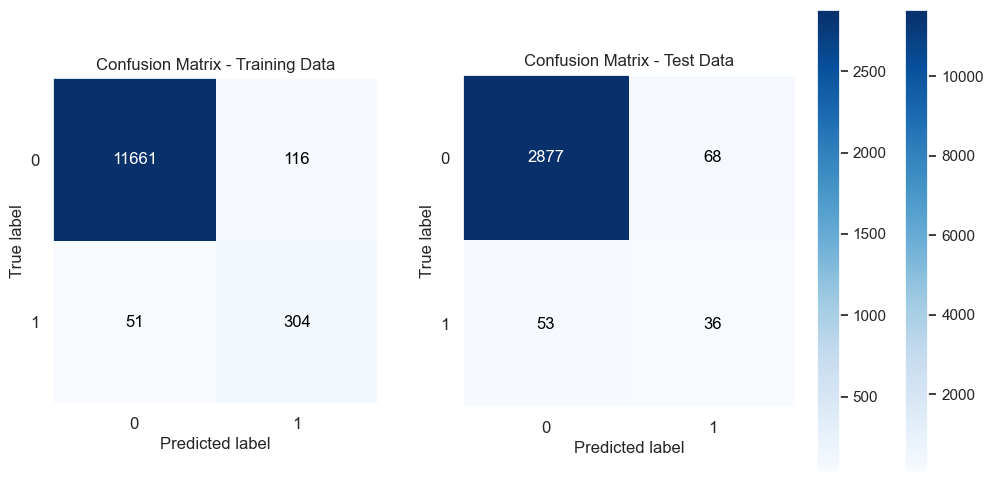

In [47]:
import scikitplot as skplt
from sklearn.metrics import classification_report

def plot_confusion_matrices(y_train, y_train_pred, y_test, y_test_pred):
    """Plots confusion matrices for training and test data.

    This function generates and displays confusion matrices for the training and test data, providing an evaluation of the model's performance in terms of classification results. The confusion matrices are displayed using the scikit-plot library.

    Args:
    y_train (array-like): True labels for the training data.
    y_train_pred (array-like): Predicted labels for the training data.
    y_test (array-like): True labels for the test data.
    y_test_pred (array-like): Predicted labels for the test data.

    Returns:
    None

    Prints the classification report for both training and test data.

    Displays the confusion matrices for both training and test data using the scikit-plot library.

    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.6]})

    for ax, y_true, y_pred, data_type in zip(axes, [y_train, y_test], [y_train_pred, y_test_pred], ['Training', 'Test']):
        skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False, ax=ax, true_labels=[0, 1])
        ax.set_title(f'Confusion Matrix - {data_type} Data')
        
        report = classification_report(y_true, y_pred)
        print(f"Classification Report - {data_type} Data:")
        print(report)
        print("\n")

    plt.show()





plot_confusion_matrices(y_train, voting_clf.predict(X_train), y_test, y_pred)

As said previously, due to the highly imbalanced nature of the dataset, the model classifies a lot the observations as belonging to the negative class, as evidenced by the confusion matrices in both the training and test sets.

<a id="14"> </a>
#### 4.2. Pipeline for different models

Having realised that we must try to rebalance the dataset, we construct a function that defines a pipeline containing the preprocessing operations to be performed, the rebalancing and the *hyperparameter tuning* via *Grid Search*. In this way we are going to train several models in order to find the best solution

In [48]:
from imblearn.combine import SMOTETomek 
from sklearn.model_selection import StratifiedKFold #stratification
from sklearn.model_selection import GridSearchCV #for validating hyperparameters
from sklearn.pipeline import Pipeline as pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, fbeta_score
import time

f2_scorer = make_scorer(fbeta_score, beta=2)
df = pd.DataFrame()

def run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name, parameters, k, choice, random_seed,
                              preprocessor, classifier):
    """
    Runs a pipeline for evaluating a machine learning model and returns evaluation metrics in a DataFrame.

    Parameters:
    X_train (array-like): Training data features.
    X_test (array-like): Test data features.
    y_train (array-like): Training data labels.
    y_test (array-like): Test data labels.
    pipe_name (str): Name of the pipeline.
    parameters (dict): Dictionary of hyperparameters for the model.
    k (int): Number of folds for cross-validation.
    choice (str): Choice between 'unbalanced' and 'rebalanced' for the pipeline.
    random_seed (int): Random seed for reproducibility.
    preprocessor (callable): Preprocessing function for the data.
    classifier (callable): Machine learning classifier.

    Returns:
    DataFrame: A DataFrame containing evaluation metrics including balanced accuracy, precision, recall, and F2 score.

    """
    global df
    
    start_time = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle= True, stratify=y, random_state= random_seed)
    
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_seed)

    if choice == 'unbalanced':
        pipe = pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
        ])
    elif choice == 'rebalanced':
        pipe = imbpipeline(steps=[
        ("preprocessor", preprocessor),
        ("Smote_tomek", SMOTETomek(random_state=random_seed)),
        ("classifier", classifier)
        ])
    else:
        print("Invalid choice. Retry")
        
    
    grid_search = GridSearchCV(estimator=pipe,
                           param_grid=parameters,
                           scoring= f2_scorer,
                           refit=True,                          
                           cv=kf, verbose=0,
                           n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    y_train_pred = grid_search.best_estimator_.predict(X_train)
    
    
    bal_acc_train = balanced_accuracy_score(y_train, y_train_pred)
    bal_acc_test = balanced_accuracy_score(y_test, y_test_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f2_train = fbeta_score(y_train, y_train_pred, beta=2)
    f2_test = fbeta_score(y_test, y_test_pred, beta=2)

    end_time = time.time()
    execution_time = end_time - start_time
    
    data = {
        'Pipe_used': pipe_name,
        'Bal_Acc_Train': bal_acc_train,
        'Bal_Acc_Test': bal_acc_test,
        'Precision_Train': precision_train,
        'Precision_Test': precision_test,
        'Recall_Train': recall_train,
        'Recall_Test': recall_test,
        'F2_Train': f2_train,
        'F2_Test': f2_test,
        'Execution_Time': execution_time
    }

    
    df = df.append(data, ignore_index=True)
    return df



<a id="15"> </a>
#### 4.3. Random Forests and Gradient Boosting Trees

Random Forests and Gradient Boosting Trees are both ensemble learning techniques used in machine learning, but they differ in the way the individual decision trees are built and the results are combined.

- **Random Forests** build multiple decision trees independently and combine their predictions through majority voting for classification or averaging for regression.
- In contrast, **Gradient Boosting Trees** create decision trees sequentially, with each tree correcting the errors of the previous one. This iterative approach aims to minimize the loss function and capture complex relationships in the data.

Let's start by considering Random Forest Classifier

Now we try to use other models by balancing (with  class_weight parameter or SMOTETomek) and always performing Hyperparameter tuning

In [49]:
rf_parameters = {
    'classifier__max_features': [None, 'sqrt'],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__criterion': ["gini", "entropy"]
}
            
            
result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='Random Forest unbalanced',
                                      parameters=rf_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=RandomForestClassifier(random_state=random_seed))
result_df

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0  Random Forest unbalanced       0.840555      0.654078         0.858657   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   

   Execution_Time  
0      161.770838

As expected, we went into overfitting, as the model does not seem to be able to generalise on test data. We need not only hyperparameter tuning but also to rebalance the dataset.<br>
First we try with class_weight parameter

In [50]:
rf_parameters = {
    'classifier__max_features': [None, 'sqrt'],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__criterion': ["gini", "entropy"]
}
            
            
result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='Random Forest classweights',
                                      parameters=rf_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=RandomForestClassifier(class_weight='balanced', random_state=random_seed))
result_df

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   

   Execution_Time  
0      161.770838  
1      174.537422

Except for precison, all the other parameters increased, but the overfitting remains and the execution time is very similar<br>
And now we try SMOTETomek as rebalancing tecnique

In [51]:
rf_parameters = {
    'classifier__max_features': [None, 'sqrt'],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__criterion': ["gini", "entropy"]
}
            
            
result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='Random Forest rebalanced',
                                      parameters=rf_parameters, k=5, random_seed=random_seed,
                                      choice='rebalanced', preprocessor=preprocessor, 
                                      classifier=RandomForestClassifier(random_state=random_seed))
result_df

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221

It seems that class_weight parameter brings us to better results than SMOTETomek technique that is very slow too<br>
Now let us try to do what we have just done with Random forest by exploiting two more advanced Gradient boosting algorithms: **XGboost** and **LightGBM**

XGBoost, which stands for "Extreme Gradient Boosting", is a powerful and popular machine learning algorithm that has gained widespread recognition for its effectiveness in a wide range of predictive modeling tasks. It falls under the category of ensemble learning methods: specifically, XGBoost is based on the gradient boosting framework, which combines the predictions of multiple weak models in a sequential manner. It focuses on correcting the errors made by previous models, leading to improved accuracy.

In particular, XGBoost utilizes decision tree ensembles, and the prediction scores assigned to every leaf of each individual tree are summed up to get the final score, for each sample

In [52]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb_parameters = {
    'classifier__learning_rate': [0.01, 0.1, 0.3], # 0.3 default. eta shrinks the feature weights to make the boosting process more conservative.
    'classifier__max_depth': [4, 6, 8], # 6 default.
    'classifier__lambda': [0.1, 1, 10] # 1 default. L2 regularization term on weights. Increasing this value will make model more conservative. 
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='XGboost unbalanced',
                                      parameters=xgb_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=XGBClassifier(random_state=random_seed))
result_df

[16:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787

XGboost was very fast and led to slightly worse results. Let’s try now using the scale_pos_weight parameter

In [53]:
xgb_parameters = {
    'classifier__learning_rate': [0.01, 0.1, 0.3], # 0.3 default. eta shrinks the feature weights to make the boosting process more conservative.
    'classifier__max_depth': [4, 6, 8], # 6 default.
    'classifier__scale_pos_weight': [5, 20, 35, 50], # control the balance of positive and negative weights, useful for unbalanced classes.
    'classifier__lambda': [0.1, 1, 10] # 1 default. L2 regularization term on weights. Increasing this value will make model more conservative. 
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='XGboost scaleposweight',
                                      parameters=xgb_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=XGBClassifier(random_state=random_seed))
result_df

[16:26:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   
4      XGboost scaleposweight       0.986966      0.730553         0.536254   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   
4        0.309859      1.000000     0.494382  0.852546  0.441767   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787  
4      555.407974

In this way we obtain better results at the cost of a longer execution time. This is the best solution until now

In [54]:
xgb_parameters = {
    'classifier__learning_rate': [0.01, 0.1, 0.3], # 0.3 default. eta shrinks the feature weights to make the boosting process more conservative.
    'classifier__max_depth': [4, 6, 8], # 6 default.
    'classifier__lambda': [0.1, 1, 10] # 1 default. L2 regularization term on weights. Increasing this value will make model more conservative. 
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='XGboost rebalanced',
                                      parameters=xgb_parameters, k=5, random_seed=random_seed,
                                      choice='rebalanced', preprocessor=preprocessor, 
                                      classifier=XGBClassifier(random_state=random_seed))
result_df

[16:42:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   
4      XGboost scaleposweight       0.986966      0.730553         0.536254   
5          XGboost rebalanced       0.861350      0.674342         0.761765   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   
4        0.309859      1.000000     0.494382  0.852546  0.441767   
5        0.500000      0.729577     0.359551  0.735795  0.380952   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787  
4      555.407974  
5      935.263445

Applying Smote the results and the execution time are very similar between Random Forest and XGboost<br>
LightGBM is a gradient boosting framework based on decision trees optimized for speed and efficiency
LightGBM uses a vertical leaf tree structure, which allows the tree to grow vertically rather than horizontally as in traditional methods. This reduces the amount of memory needed and speeds up the training process.

In [55]:
import lightgbm as lgb

lgb_parameters = {
    'classifier__num_leaves':[10, 30, 50],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__lambda_l1': [0.1, 1, 10],
    'classifier__lambda_l2': [0.1, 1, 10]
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='lightgbm unbalanced',
                                      parameters=lgb_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=lgb.LGBMClassifier(random_state=random_seed))
result_df

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 355, number of negative: 11777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 12132, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029261 -> initscore=-3.501786
[LightGBM] [Info] Start training from score -3.501786
[LightGBM] [Warning] lambda_l1 

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   
4      XGboost scaleposweight       0.986966      0.730553         0.536254   
5          XGboost rebalanced       0.861350      0.674342         0.761765   
6         lightgbm unbalanced       0.824206      0.637563         0.895349   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   
4        0.309859      1.000000     0.494382  0.852546  0.441767   
5        0.500000      0.729577     0.359551  0.735795  0.380952   
6        0.595238      0.650704     0.280899  0.688319  0.314070   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787  
4      555.407974  
5      935.263445  
6      133.535976

In this case lightgbm was  fast almost like XGboost and the results are just a bit better

In [56]:
lgb_parameters = {
    'classifier__num_leaves':[10, 30, 50],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__lambda_l1': [0.1, 1, 10],
    'classifier__lambda_l2': [0.1, 1, 10]
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='lightgbm isunbalance',
                                      parameters=lgb_parameters, k=5, random_seed=random_seed,
                                      choice='unbalanced', preprocessor=preprocessor, 
                                      classifier=lgb.LGBMClassifier(is_unbalance=True, random_state=random_seed))
result_df

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 355, number of negative: 11777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 12132, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029261 -> initscore=-3.501786
[LightGBM] [Info] Start training from score -3.501786
[LightGBM] [Warning] lambda_l1 

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   
4      XGboost scaleposweight       0.986966      0.730553         0.536254   
5          XGboost rebalanced       0.861350      0.674342         0.761765   
6         lightgbm unbalanced       0.824206      0.637563         0.895349   
7        lightgbm isunbalance       0.986881      0.717958         0.534639   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   
4        0.309859      1.000000     0.494382  0.852546  0.441767   
5        0.500000      0.729577     0.359551  0.735795  0.380952   
6        0.595238      0.650704     0.280899  0.688319  0.314070   
7        0.283784      1.000000     0.471910  0.851727  0.416667   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787  
4      555.407974  
5      935.263445  
6      133.535976  
7      136.320423

This solution is fast and lead to great results, slightly worse than xgboost but more quickly

In [57]:
lgb_parameters = {
    'classifier__num_leaves':[10, 30, 50],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__lambda_l1': [0.1, 1, 10],
    'classifier__lambda_l2': [0.1, 1, 10]
}

result_df = run_and_evaluate_pipeline(X_train, X_test, y_train, y_test, pipe_name='lightgbm rebalanced',
                                      parameters=lgb_parameters, k=5, random_seed=random_seed,
                                      choice='rebalanced', preprocessor=preprocessor, 
                                      classifier=lgb.LGBMClassifier(random_state=random_seed))
result_df

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 11758, number of negative: 11758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6109
[LightGBM] [Info] Number of data points in the train set: 23516, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current v

Pipe_used  Bal_Acc_Train  Bal_Acc_Test  Precision_Train  \
0    Random Forest unbalanced       0.840555      0.654078         0.858657   
1  Random Forest classweights       0.984744      0.716245         0.546440   
2    Random Forest rebalanced       0.876715      0.656470         0.762712   
3          XGboost unbalanced       0.811572      0.631606         0.895161   
4      XGboost scaleposweight       0.986966      0.730553         0.536254   
5          XGboost rebalanced       0.861350      0.674342         0.761765   
6         lightgbm unbalanced       0.824206      0.637563         0.895349   
7        lightgbm isunbalance       0.986881      0.717958         0.534639   
8         lightgbm rebalanced       0.869885      0.669064         0.770349   

   Precision_Test  Recall_Train  Recall_Test  F2_Train   F2_Test  \
0        0.595745      0.684507     0.314607  0.713447  0.347395   
1        0.330645      0.994366     0.460674  0.854308  0.427083   
2        0.432836      0.760563     0.325843  0.760992  0.342790   
3        0.558140      0.625352     0.269663  0.665468  0.300752   
4        0.309859      1.000000     0.494382  0.852546  0.441767   
5        0.500000      0.729577     0.359551  0.735795  0.380952   
6        0.595238      0.650704     0.280899  0.688319  0.314070   
7        0.283784      1.000000     0.471910  0.851727  0.416667   
8        0.508197      0.746479     0.348315  0.751134  0.371703   

   Execution_Time  
0      161.770838  
1      174.537422  
2      892.880221  
3      123.609787  
4      555.407974  
5      935.263445  
6      133.535976  
7      136.320423  
8     1870.453267

Smote as usual gives  good results with an higher execution time. lightgbm isunbalance and XGboost scaleposweight are the best model, the first one is faster while the second one leads to better results . Therefore, we choose lightgbm isunbalance as our final model to predict the customers' creditworthiness because it has the best trade off between the performances and computational cost

<a id="16"> </a>
### 5. Interpreting the final model

Now I take the final dataframe, perform the preprocessing transformations and apply the final model I have just chosen  

In [58]:
def apply_transformations(df):
    """
    Apply transformations to a DataFrame for feature encoding and ordinal mapping.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: A new DataFrame with applied transformations.

    This function performs the following transformations:
    1. Creates a copy of the original DataFrame to keep the original intact.
    2. Applies one-hot encoding (pd.get_dummies) to specific columns: 
       'INCOME_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE'.
    3. Applies ordinal encoding to specific columns:
       - 'CODE_GENDER' using the mapping {'F': 0, 'M': 1}.
       - 'FLAG_OWN_CAR' using the mapping {'N': 0, 'Y': 1}.
       - 'FLAG_OWN_REALTY' using the mapping {'N': 0, 'Y': 1}.
       - 'EDUCATION_TYPE' using a predefined mapping.

    Note:
    - The original DataFrame is not modified; the transformations are applied to a copy.
    - Ensure that the input DataFrame has the required columns for encoding.

    Example:
    df_transformed = apply_transformations(input_dataframe)

    """
    # Copy the original DataFrame to keep the original intact
    df_result = df.copy()

    # Apply pd.get_dummies to specific columns
    columns_to_dummies = ['INCOME_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE']
    df_result = pd.get_dummies(df_result, columns=columns_to_dummies, prefix=columns_to_dummies)
    
    # Apply Ordinal Encoding to specific columns
    gender_map = {"F": 0, "M": 1}
    flag_car_map = {"N": 0, "Y": 1}
    flag_realty_map = {"N": 0, "Y": 1}
    education_map = {"Lower secondary": 0, "Secondary / secondary special": 1,
                     "Incomplete higher": 2, "Higher education": 3, "Academic degree": 4}
    
    df_result["CODE_GENDER"] = df_result["CODE_GENDER"].map(gender_map)
    df_result["FLAG_OWN_CAR"] = df_result["FLAG_OWN_CAR"].map(flag_car_map)
    df_result["FLAG_OWN_REALTY"] = df_result["FLAG_OWN_REALTY"].map(flag_realty_map)
    df_result["EDUCATION_TYPE"] = df_result["EDUCATION_TYPE"].map(education_map)

    return df_result

In [59]:
#Apply transformations using the function
df_transformed = apply_transformations(final_df)

In [60]:
names_column_transformed = df_transformed.drop(columns="bad_customer").columns
X = df_transformed.drop(columns="bad_customer")
y = df_transformed["bad_customer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle= True, stratify=y, random_state= random_seed)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)


grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(is_unbalance=True, random_state=random_seed),
                           param_grid=lgb_parameters,
                           scoring= f2_scorer,
                           refit=True,                          
                           cv=kf, verbose=0,
                           n_jobs=-1)



grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
[LightGBM] [Info] Number of positive: 355, number of negative: 11777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 12132, number of used featur

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(is_unbalance=True, random_state=0),
             n_jobs=-1,
             param_grid={'classifier__lambda_l1': [0.1, 1, 10],
                         'classifier__lambda_l2': [0.1, 1, 10],
                         'classifier__learning_rate': [0.01, 0.1, 0.3],
                         'classifier__num_leaves': [10, 30, 50]},
             scoring=make_scorer(fbeta_score, beta=2))

Let's take a look at how the classification report and confusion matrix change with this final model

[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11777
           1       0.28      0.99      0.44       355

    accuracy                           0.93     12132
   macro avg       0.64      0.96      0.70     12132
weighted avg       0.98      0.93      0.94     12132



Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.98      0.91   

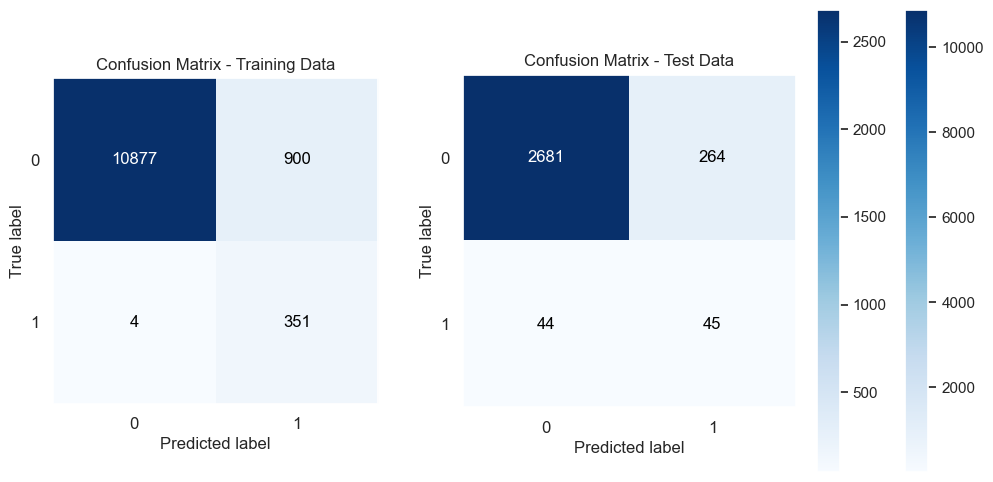

In [61]:
y_pred_test = grid_search.best_estimator_.predict(X_test)
plot_confusion_matrices(y_train, grid_search.best_estimator_.predict(X_train), y_test, y_pred_test)

As expected, performances are more balanced between the classes

In conclusion, let's delve into the model's results to gain insights into why the model produces a particular prediction for a given data point and which features play a crucial role in shaping that prediction. To achieve this, we turn to the **SHAP** (SHapley Additive exPlanations) technique.

SHAP (SHapley Additive exPlanations) is a machine learning interpretation technique designed to explain how input features contribute to a model's predictions.

The goal of SHAP is to explain the prediction of an instance $x$ by computing the contribution of each feature to the prediction. SHAP computes **SHAP values** for each input feature. These values represent the contribution of each feature to the model's output for a specific data instance. For instance, it quantifies how much a specific feature increased or decreased the prediction compared to the model's average prediction.

SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained. The easiest way to see this is through a **waterfall plot** that starts at our background prior expectation for the output of the model $E[f(X)]$, and then adds features one at a time until we reach the current model output $f(X_i)$ for the data point $X_i$:

In [62]:
import shap
warnings.filterwarnings("ignore", category=UserWarning)

[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
[LightGBM] [Info] Number of positive: 355, number of negative: 11777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 12132, number of used featur

LGBMClassifier(classifier__lambda_l1=0.1, classifier__lambda_l2=0.1,
               classifier__learning_rate=0.01, classifier__num_leaves=10,
               is_unbalance=True, random_state=0)

Index: 0
True y: 0
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l1
[LightGBM] [Warning] Unknown parameter: classifier__lambda_l2
[LightGBM] [Warning] Unknown parameter: classifier__learning_rate
[LightGBM] [Warning] Unknown parameter: classifier__num_leaves
Predicted y: 0


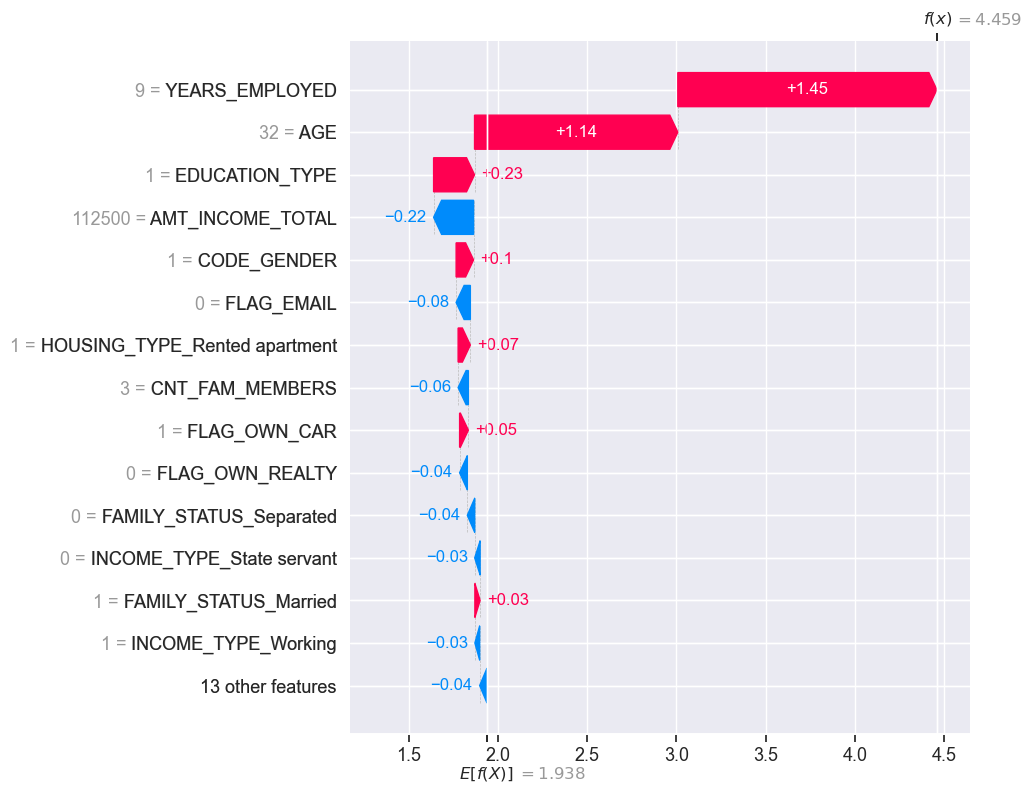

In [63]:
# Training the model with training data
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Create a SHAP explainer object with the trained model
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for X_test
shap_values = explainer.shap_values(X_test)

# Find the index of the observation that satisfies the condition
index_of_interest = np.where((y_test == 0) & (y_pred_test == 0))[0][0]

print(f"Index: {index_of_interest}")
print(f"True y: {y_test[index_of_interest]}")
print(f"Predicted y: {final_model.predict(X_test)[index_of_interest]}")
# Waterfall Plot on a single observation
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], base_values=explainer.expected_value[0], 
                                     data=X_test.iloc[index_of_interest]), max_display=15)


In the waterfall above, the x-axis has the values of the target (dependent) variable which is credit worthiness. x is the chosen observation, $f(x)$ is the predicted value of the model, given input x and $E[f(x)]$ is the expected value of the target variable ( The value of $f(x)$ is associated with the probability of credit unreliability), or in other words, the mean of all predictions $(mean(model.predict(X)))$.

The SHAP value for each feature in this observation is given by the length of the bar. In the example above, YEARS_EMPLOYED has a SHAP value of +1.45, AGE has a SHAP of +1.14 and so on. The sum of all SHAP values will be equal to $E[f(x)] — f(x)$.

The absolute SHAP value shows us how much a single feature affected the prediction, so YEARS_EMPLOYED contributed the most, AGE the second one and so on and the last ones are the features with the lowest contribution to the preditcion.

Note that these SHAP values are valid for *this observation only*. With other data points the SHAP values will change.

In this example, we observe that the customer's age of 32, along with nine years of employment,  increases his probability of credit unreliability but at the same time for the same customer his amt income total reduces it. We can get confirmation of this from the force plot

In [67]:
# Force Plot su una singola osservazione
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[index_of_interest])

Instead, the SHAP **summary plot** is a graph that provides an overall view of the importance of different features in the model. Specifically, it shows the SHAP values for each observation in the test dataset, highlighting how each feature contributes to the predictions of the model.

Here is some key information you can get from a SHAP summary plot:

Overall feature impact: The horizontal bars in the plot represent the features, and their length indicates how much each feature contributed, in absolute terms, to the model predictions. Features with longer bars have a greater impact on the predictions.

Direction of impact: The colour of the bars indicates the direction of impact. For example, blue bars indicate negative contributions, while red bars indicate positive contributions. This means that blue features lower the prediction of the model, while red features increase it.

Distribution of SHAP values: You can see how the SHAP values for each feature vary across the dataset. This gives an indication of the consistency of the effect of a feature across different observations.

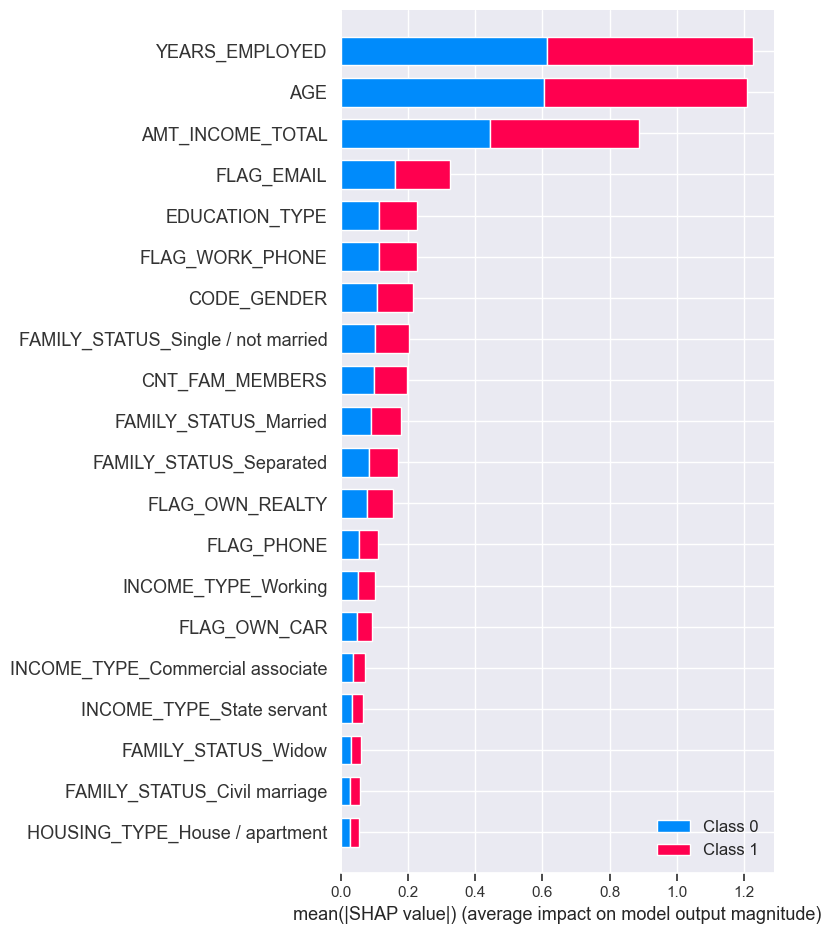

In [65]:
# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

`AGE`, `YEARS_EMPLOYED`, and `AMT_INCOME_TOTAL` are the most influential features in assessing a customer's creditworthiness.<br>
lternatively, we have **Beeswarm Plot**, which is a type of scatter plot that displays the values of one or more features for each class. This can help to understand the distribution of features between classes.

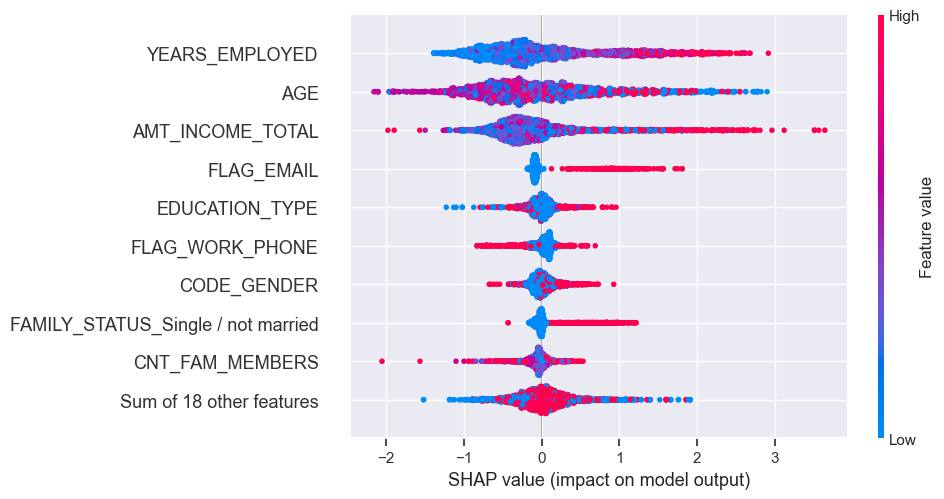

In [66]:
# Create an Explanation object
shap_explanation = shap.Explanation(values=shap_values[0], 
                                    base_values=explainer.expected_value[0], 
                                    data=X_test)

# Beeswarm plot
shap.plots.beeswarm(shap_explanation)

Once more, we observe that `AGE`, `AMT_INCOME_TOTAL` and `YEARS_EMPLOYED` are the most influential features in assessing a customer's creditworthiness.
Seems that `AMT_INCOME_TOTAL` and `YEARS_EMPLOYED` have a similar behaviour
For instance, apart from a few exceptions, high values of the `YEARS_EMPLOYED` variable have a high positive influence on the prediction (as expected), while low values have a negative impact. We can make the same argument for `AMT_INCOME_TOTAL`. On the contrary, it's worth noting how being married (`FAMILY_STATUS_Single /not married` feature) doesn't significantly affect the prediction, while not being married could mainly increase the probability of credit unreliability for potential customers.